In [1]:
import torch
print(f"Version de PyTorch utilizada: {torch.__version__}")


Version de PyTorch utilizada: 2.6.0+cpu


In [2]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)


2.6.0+cpu
0.21.0+cpu


In [3]:
from pathlib import Path

custom_image_path = Path("data/seg_pred/seg_pred/3.jpg")
custom_image_path

WindowsPath('data/seg_pred/seg_pred/3.jpg')

In [7]:
import torchvision

target_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

target_image = target_image / 255.0
# Print out image data
print(f"Custom image tensor:\n{target_image}\n")
print(f"Custom image shape: {target_image.shape}\n")
print(f"Custom image dtype: {target_image.dtype}")

Custom image tensor:
tensor([[[0.1608, 0.2549, 0.1765,  ..., 0.1255, 0.1922, 0.0157],
         [0.2078, 0.2314, 0.2824,  ..., 0.0706, 0.1255, 0.0078],
         [0.4235, 0.1294, 0.2235,  ..., 0.0196, 0.0157, 0.0118],
         ...,
         [0.2314, 0.1725, 0.2039,  ..., 0.0863, 0.0706, 0.0549],
         [0.1373, 0.1608, 0.2235,  ..., 0.1176, 0.1020, 0.0824],
         [0.1882, 0.1373, 0.1373,  ..., 0.1176, 0.1255, 0.1294]],

        [[0.1608, 0.2549, 0.1765,  ..., 0.1255, 0.1922, 0.0157],
         [0.2078, 0.2314, 0.2824,  ..., 0.0706, 0.1255, 0.0078],
         [0.4235, 0.1294, 0.2235,  ..., 0.0196, 0.0157, 0.0118],
         ...,
         [0.2314, 0.1725, 0.2039,  ..., 0.0863, 0.0706, 0.0549],
         [0.1373, 0.1608, 0.2235,  ..., 0.1176, 0.1020, 0.0824],
         [0.1882, 0.1373, 0.1373,  ..., 0.1176, 0.1255, 0.1294]],

        [[0.1608, 0.2549, 0.1765,  ..., 0.1255, 0.1922, 0.0157],
         [0.2078, 0.2314, 0.2824,  ..., 0.0706, 0.1255, 0.0078],
         [0.4235, 0.1294, 0.2235,  ..

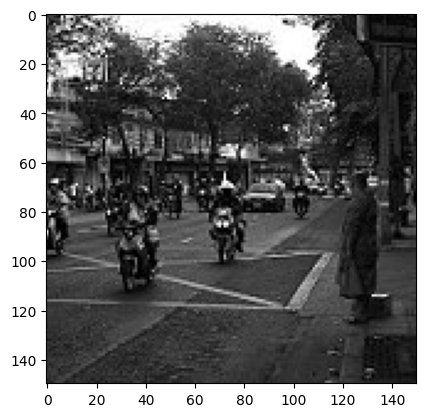

In [8]:
import matplotlib.pyplot as plt
plt.imshow(target_image.permute(1, 2, 0))

In [9]:
image_path_glob = Path("data/seg_test")
image_path_glob

WindowsPath('data/seg_test')

In [10]:
from PIL import Image

image_path_list = list(image_path_glob.glob("*/*/*.jpg")) #obtain all the images paths in the folder
print(f" number of images inside the testFolder: {len(image_path_list)}")

 number of images inside the testFolder: 3000


data\seg_test\seg_test\glacier\20842.jpg
glacier
Random image path: data\seg_test\seg_test\glacier\20842.jpg
image class: glacier
image heigth: 150
image width: 150


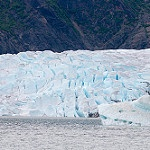

In [11]:
#Get the label of the image
import random 
random_number_path = random.choice(image_path_list)
print(random_number_path)

image_class = random_number_path.parent.stem #parent is all the other directorys and stem is the last one that is the class
print(image_class)

img = Image.open(random_number_path)
# print metadata
print(f"Random image path: {random_number_path}")
print(f"image class: {image_class}")
print(f"image heigth: {img.height}")
print(f"image width: {img.width}")
img

In [12]:
train_dir = Path('data/seg_train/seg_train')
test_dir = Path('data/seg_test/seg_test')
train_dir, test_dir

(WindowsPath('data/seg_train/seg_train'),
 WindowsPath('data/seg_test/seg_test'))

In [13]:
import model_builder
import data_setup
import argparse
from torchvision import transforms
from pathlib import Path

# Configurar argumentos
parser = argparse.ArgumentParser()
parser.add_argument('--train_dir', type=str, default='data/seg_train/seg_train')
parser.add_argument('--test_dir', type=str, default='data/seg_test/seg_test')
parser.add_argument('--batch_size', type=int, default=32)

# Evitar error en Jupyter
args = parser.parse_args(args=[])

# Transformaciones (cambiar nombre para evitar sobrescribir 'transforms')
data_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

# Convertir rutas a string si se usa Path
train_dir = str(args.train_dir)
test_dir = str(args.test_dir)

# Crear DataLoaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=data_transforms,
    batch_size=args.batch_size
)

print(f"Clases detectadas: {class_names}")
print(f"Imágenes en train: {len(train_dataloader.dataset)}")
print(f"Imágenes en test: {len(test_dataloader.dataset)}")


Clases detectadas: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Imágenes en train: 14034
Imágenes en test: 3000


In [14]:
help(data_setup) #useful to see the documentation of the function

Help on module data_setup:

NAME
    data_setup

FUNCTIONS
    create_dataloaders(train_dir: str, test_dir: str, transform: torchvision.transforms.transforms.Compose, batch_size: int)
        Creates training and testing DataLoaders.

        Takes in a training directory and testing directory path and turns
        them into PyTorch Datasets and then into PyTorch DataLoaders.

        Args:
          train_dir: Path to training directory.
          test_dir: Path to testing directory.
          transform: torchvision transforms to perform on training and testing data.
          batch_size: Number of samples per batch in each of the DataLoaders.
          num_workers: An integer for number of workers per DataLoader.

        Returns:
          A tuple of (train_dataloader, test_dataloader, class_names).
          Where class_names is a list of the target classes.
          Example usage:
            train_dataloader, test_dataloader, class_names =         = create_dataloaders(train_dir

In [15]:
# check the dataloader
img, label = next(iter(train_dataloader))
img.shape, label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [16]:
#instanciate the model
model = model_builder.CNN(input_shape=3, hidden_units=16, output_shape=len(class_names))
model

CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=16384, out_features=6, bias=True)
  )
)

In [17]:
#prove our model hyperparameters works well

random_tesor = torch.rand(size=(1,3,64,64))
random_tesor.shape


y_pred = model(random_tesor)
y_pred

tensor([[ 0.0095, -0.4540, -0.2223, -0.1667, -0.2373, -0.0646]],
       grad_fn=<AddmmBackward0>)

In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [19]:
import engine 

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

train_loss, train_acc = engine.train_step(model=model, train_dataloader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, device=device)

  0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
train_loss, train_acc

(5.578784725932162, 0.16967223487724628)

In [21]:
import torch
print(torch.cuda.is_available())  # Should return True if your GPU is detected

False


In [23]:
#test our training model

model_copy = model_builder.CNN(input_shape=3, hidden_units=16, output_shape=len(class_names))
model.load_state_dict(torch.load("models/0.first_model.pth"))
model

CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=16384, out_features=6, bias=True)
  )
)

In [50]:
image_path_glob = Path("data/seg_pred")
print(image_path_glob)
image_path_list = list(image_path_glob.glob("*/*.jpg")) #obtain all the images paths in the folder
print(len(image_path_list))

data\seg_pred
7301


In [65]:
# select and image from the seg_pred folder

# custom_image_pred_path = Path("data/seg_pred/seg_pred/3.jpg") <- firs example

custom_image = torchvision.io.read_image(str(random.choice(image_path_list))).type(torch.float32)
custom_image = custom_image / 255.

print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.0000, 0.0157, 0.0078,  ..., 0.4980, 0.4627, 0.1451],
         [0.0314, 0.0275, 0.0235,  ..., 0.3647, 0.0000, 0.4078],
         [0.0627, 0.0471, 0.0471,  ..., 0.0000, 0.3020, 0.5137],
         ...,
         [0.0667, 0.0196, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0588, 0.0196, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0314, 0.0039, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0157, 0.0078,  ..., 0.4980, 0.4627, 0.1451],
         [0.0314, 0.0275, 0.0235,  ..., 0.3647, 0.0000, 0.4078],
         [0.0627, 0.0471, 0.0471,  ..., 0.0000, 0.3020, 0.5137],
         ...,
         [0.0667, 0.0196, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0588, 0.0196, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0314, 0.0039, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0157, 0.0078,  ..., 0.4980, 0.4627, 0.1451],
         [0.0314, 0.0275, 0.0235,  ..., 0.3647, 0.0000, 0.4078],
         [0.0627, 0.0471, 0.0471,  ..

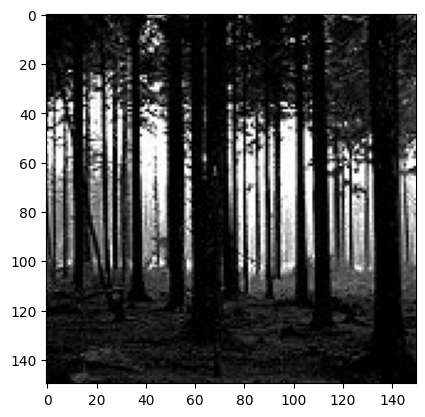

In [66]:
plt.imshow(custom_image.permute(1, 2, 0))

In [67]:
custom_transform = transforms.Compose([
    transforms.Resize(size=(64, 64))
])

custom_image_transforms = custom_transform(custom_image)
# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transforms.shape}")

Original shape: torch.Size([3, 150, 150])
New shape: torch.Size([3, 64, 64])


In [68]:
#eval in our model
model.eval()
with torch.no_grad():
    custom_image_transformed_with_batch_size = custom_image_transforms.unsqueeze(0)
    
    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transforms.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model(custom_image_transforms.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [69]:
custom_image_pred

tensor([[  1.7941,   3.5070, -16.2168, -13.9239, -12.2029,   7.4132]])

In [70]:
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_labels = torch.argmax(custom_image_pred, dim=1)
custom_image_pred_labels

tensor([5])

Text(0.5, 1.0, 'street')

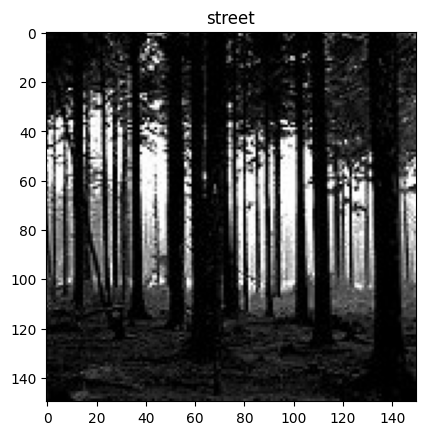

In [71]:
plt.imshow(custom_image.permute(1, 2, 0))
plt.title(class_names[custom_image_pred_labels.item()])